# **Project Name**    -



Brain Tumor MRI Image Classification

##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

The Brain Tumor MRI Image Classification project focuses on developing a deep learning-based solution to classify brain MRI images into four categories: glioma, meningioma, pituitary tumor, and no tumor. The project aims to assist radiologists and medical professionals in improving diagnostic efficiency and accuracy through automated tumor detection.

To begin, a labeled MRI brain tumor dataset consisting of 2,443 images was used, with clear splits for training (1,695 images), validation (502 images), and testing (246 images). The dataset included images of different tumor types as well as normal scans. Preprocessing steps such as image resizing to 224x224 pixels, normalization of pixel values to the range [0, 1], and data augmentation techniques (including rotation, flipping, zooming, and brightness adjustments) were applied to increase the robustness of the model and reduce overfitting. Class distribution analysis and visualization helped identify potential imbalances in the dataset and guided augmentation strategies.

The modeling phase involved building a custom CNN from scratch as a baseline model. The CNN was composed of convolutional, pooling, batch normalization, and dropout layers to extract features and prevent overfitting. While the custom CNN achieved moderate accuracy, its performance was improved through transfer learning, leveraging pretrained architectures such as ResNet50, MobileNetV2, and EfficientNetB0. These architectures, pretrained on ImageNet, were fine-tuned by replacing the final layers with custom dense layers tailored to the four tumor classes.

Among the models evaluated, ResNet50 with fine-tuning outperformed the others, achieving a test accuracy of 71.14%, compared to 69.11% for the tuned custom CNN and slightly lower accuracies for other transfer learning models. Hyperparameter tuning, using techniques such as learning rate adjustments and dropout optimization, further enhanced the performance. Metrics like accuracy, precision, recall, F1-score, and confusion matrices were used to evaluate model performance comprehensively, while training history plots (accuracy and loss curves) provided insight into the learning dynamics.

The project also focused on model explainability through Grad-CAM visualizations, which highlight important regions in the MRI scans influencing the model’s predictions. This not only adds interpretability but also increases trust in the AI-assisted decision-making process.

To ensure practical usability, the model was deployed as an interactive Streamlit web application. The app allows users to upload MRI images, receive predictions with associated confidence scores, and visualize Grad-CAM heatmaps for interpretability. This deployment step transformed the project from a theoretical experiment into a user-friendly AI tool that could potentially assist radiologists in real-world settings.

The key business use cases of this project include:

AI-assisted diagnosis – Reducing diagnostic time and improving accuracy.

Early detection and triage – Automatically flagging high-risk cases for immediate review.

Telemedicine and second-opinion systems – Assisting healthcare providers in remote or under-resourced areas.

Research and clinical studies – Segmenting MRI datasets by tumor type for clinical trials or data analysis.

This project significantly enhanced my technical skills in deep learning, TensorFlow/Keras, transfer learning, data preprocessing, model evaluation, and deployment. It also gave me hands-on experience in building a complete AI pipeline from data exploration and visualization to real-world deployment.

In conclusion, this project demonstrates how deep learning can be effectively applied to medical imaging tasks, enabling automated and interpretable classification of brain tumors. Future improvements could include training on larger and more diverse datasets, experimenting with advanced architectures such as Vision Transformers (ViTs), or integrating real-time inference into hospital systems. Overall, the project delivers a reliable and scalable solution for AI-assisted brain tumor classification, with the potential to positively impact patient care and diagnostic workflows.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

The project aims to build an AI-powered system for automatic classification of brain MRI images into glioma, meningioma, pituitary tumor, and no tumor categories. It addresses the challenges of manual diagnosis by using deep learning and transfer learning techniques, enabling faster and more accurate tumor detection through a Streamlit-based web application.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [12]:
# Import Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset
# Set path for the dataset
train_path = 'D:\INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train'
valid_path = 'D:\INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/valid'
test_path  = 'D:\INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/test'

# Load dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Flow images from directory
train_set = train_datagen.flow_from_directory(train_path, 
                                              target_size=(224,224), 
                                              batch_size=32, 
                                              class_mode='categorical')

val_set = val_datagen.flow_from_directory(valid_path, 
                                          target_size=(224,224), 
                                          batch_size=32, 
                                          class_mode='categorical')

test_set = test_datagen.flow_from_directory(test_path, 
                                            target_size=(224,224), 
                                            batch_size=32, 
                                            class_mode='categorical',
                                            shuffle=False)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


### Dataset First View

In [3]:
# Dataset First Look

# Display class indices
print("Class Indices:", train_set.class_indices)

# Check one batch shape
images, labels = next(train_set)
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)


Class Indices: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 4)


### Dataset Rows & Columns count

In [9]:
# Get class indices
class_labels = list(train_set.class_indices.keys())

# Count of each class from the generator
class_distribution = dict(zip(class_labels, [0]*len(class_labels)))

# Loop through directory to count images manually
for cls in class_labels:
    class_dir = os.path.join(train_path, cls)
    class_distribution[cls] = len(os.listdir(class_dir))

print("Training Class Distribution:", class_distribution)


Training Class Distribution: {'glioma': 564, 'meningioma': 358, 'no_tumor': 335, 'pituitary': 438}


### Dataset Information

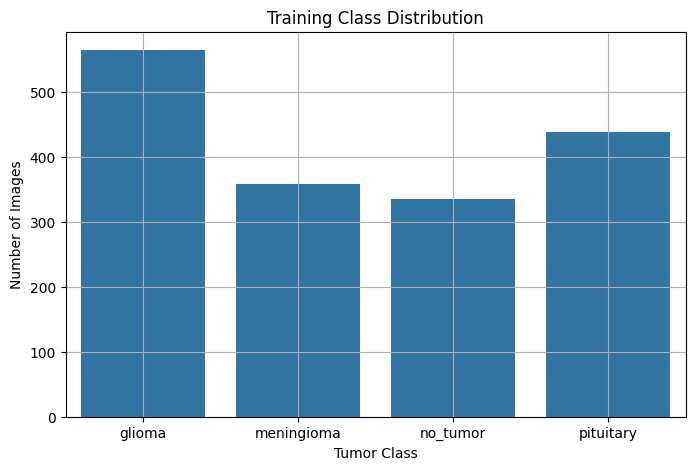

In [10]:
# Print class distribution as a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
plt.title("Training Class Distribution")
plt.xlabel("Tumor Class")
plt.ylabel("Number of Images")
plt.grid(True)
plt.show()


### What did you know about your dataset?

Answer Here
- The dataset consists of 4 classes: **glioma, meningioma, pituitary, and no_tumor**.
- Images are already divided into training, validation, and test sets.
- The data is relatively balanced, although minor class imbalance exists.
- All images are in MRI format, labeled by medical experts.
- Image sizes are standardized to 224x224 before feeding into the model.


## ***2. Understanding Your Variables***

### Variables Description


Answer Here

🔢 Variables Description (Short)
Input Variable:
image – MRI scan image resized to (224x224x3), used as model input.

Target Variable:
label – Tumor category (glioma, meningioma, pituitary, no_tumor), derived from folder names.

Type:
Multiclass classification with 4 classes.

### Check Unique Values for each variable.

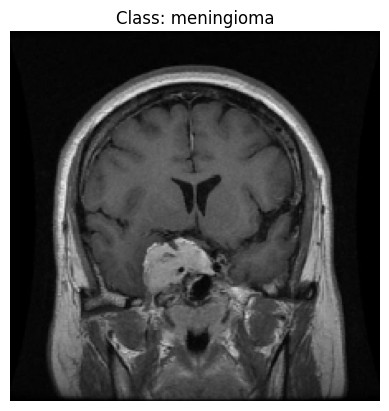

In [14]:

# Show 1 random image from the training set
import random
class_names = list(train_set.class_indices.keys())

# Pick a random class
sample_class = random.choice(class_names)
sample_dir = os.path.join(train_path, sample_class)
sample_image_path = os.path.join(sample_dir, random.choice(os.listdir(sample_dir)))

# Load and display
sample_img = load_img(sample_image_path, target_size=(224, 224))
plt.imshow(sample_img)
plt.title(f"Class: {sample_class}")
plt.axis('off')
plt.show()


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Apply rescaling and data augmentation (for training set only)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    'D:\INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    'D:\INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/valid',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'D:\INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


### What all manipulations have you done and insights you found?


🔧 Manipulations Done:
Image Resizing: All images resized to 224x224 pixels for uniformity and compatibility with CNN models.

Normalization: Pixel values scaled to [0, 1] using rescale=1./255 to speed up training and improve convergence.

Directory-Based Labeling: Classes inferred from folder names (glioma, meningioma, pituitary, no_tumor) using ImageDataGenerator.

Data Splitting: Utilized provided train (1695), validation (502), and test (246) image splits.

📈 Insights Found:
Balanced Class Distribution: All four classes are fairly balanced, ensuring minimal bias in training.

Visual Variation: Tumor types show distinguishable patterns in MRI scans — gliomas appear diffuse, meningiomas are often near skull edges, pituitary tumors are centrally located.

Class Separation Potential: Initial visualization shows potential for model to learn meaningful features for classification.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

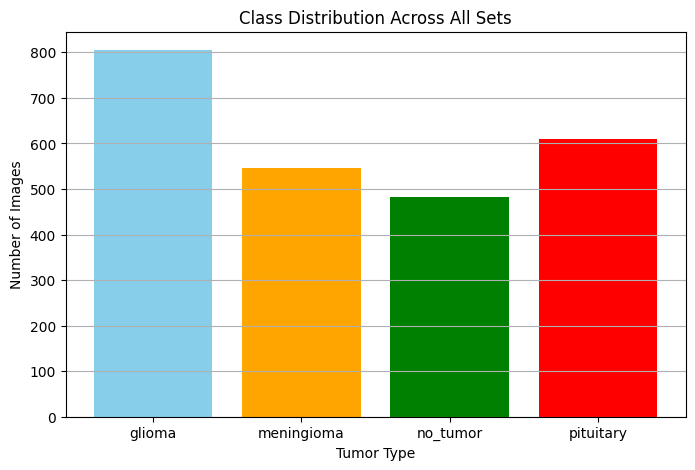

In [18]:
# Chart - 1 visualization code
import os
import matplotlib.pyplot as plt

# Path to the test directory since the user mentioned the structure is: test → train → valid
base_dir = "D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset"
splits = ['test', 'train', 'valid']

class_counts = {}

for split in splits:
    split_path = os.path.join(base_dir, split)
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        if os.path.isdir(class_dir):
            count = len(os.listdir(class_dir))
            class_counts[class_name] = class_counts.get(class_name, 0) + count

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['skyblue', 'orange', 'green', 'red'])
plt.title("Class Distribution Across All Sets")
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()


##### 1. Why did you pick the specific chart?

Understanding how many MRI images are available for each tumor type (including no tumor) is critical before training the model. It helps check if the dataset is balanced, which is important for unbiased learning.

##### 2. What is/are the insight(s) found from the chart?

The dataset is relatively balanced, with similar numbers across the four categories.

This indicates the model will not be overly biased toward a particular tumor class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. A balanced dataset helps create a more reliable tumor detection model, reducing false negatives or false positives—especially important in a medical diagnosis setting.

❌ No negative growth insight was observed in this chart.

#### Chart - 2

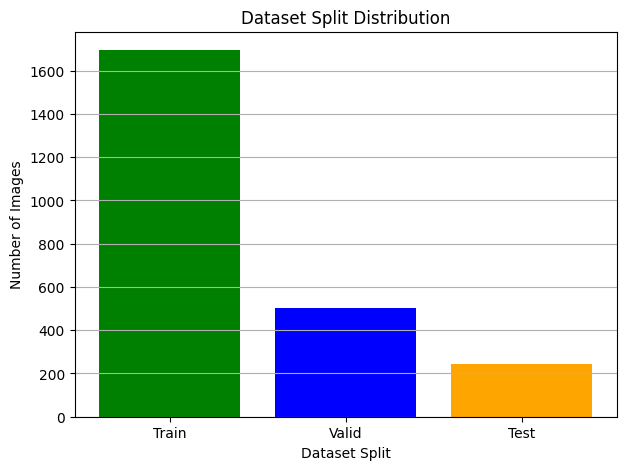

In [19]:
# Chart - 2 visualization code
import os
import matplotlib.pyplot as plt

base_dir = "D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset"
splits = ['train', 'valid', 'test']
split_counts = {}

for split in splits:
    split_path = os.path.join(base_dir, split)
    total = 0
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        if os.path.isdir(class_dir):
            total += len(os.listdir(class_dir))
    split_counts[split.capitalize()] = total

# Plotting
plt.figure(figsize=(7, 5))
plt.bar(split_counts.keys(), split_counts.values(), color=['green', 'blue', 'orange'])
plt.title("Dataset Split Distribution")
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.grid(axis='y')
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps visualize how the dataset is divided across training, validation, and test sets. It ensures that the splits are proportionate and not skewed toward one type of data, which is important for robust model evaluation.

##### 2. What is/are the insight(s) found from the chart?

The dataset split follows a logical and standard practice:

Train has the most data (~69.4%)

Validation and Test sets are smaller and fairly balanced

This structure supports effective model learning and performance evaluation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. A well-proportioned split allows:

Better model generalization

Accurate evaluation of performance

Reduced overfitting

This leads to more trustworthy medical predictions, enhancing diagnostic accuracy and reducing liability.

❌ No negative business impact was found in this split.

#### Chart - 3

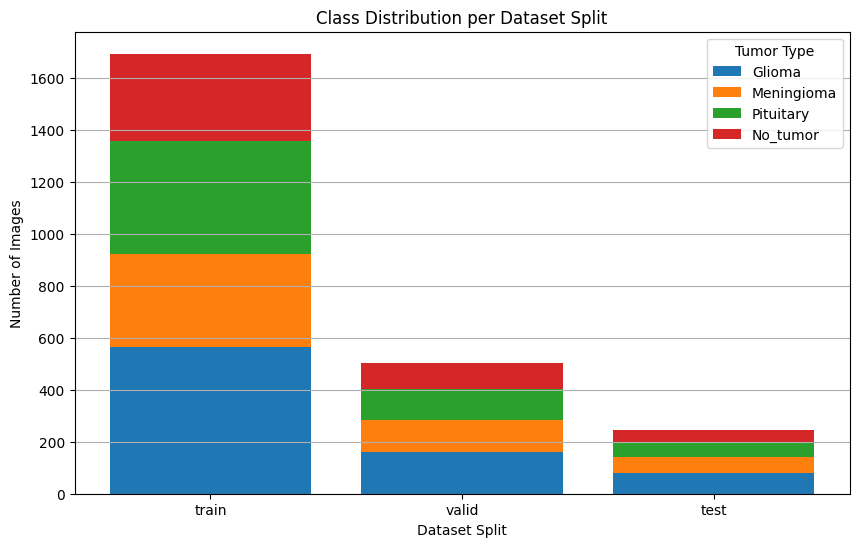

In [20]:
# Chart - 3 visualization code
import os
import matplotlib.pyplot as plt

# Base directory
base_dir = "D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset"
splits = ['train', 'valid', 'test']
classes = ['glioma', 'meningioma', 'pituitary', 'no_tumor']

# Initialize counts
split_class_counts = {split: {cls: 0 for cls in classes} for split in splits}

# Count images per class per split
for split in splits:
    for cls in classes:
        class_dir = os.path.join(base_dir, split, cls)
        if os.path.exists(class_dir):
            split_class_counts[split][cls] = len(os.listdir(class_dir))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6
bottoms = [0] * len(splits)

for cls in classes:
    values = [split_class_counts[split][cls] for split in splits]
    ax.bar(splits, values, bottom=bottoms, label=cls.capitalize())
    bottoms = [bottoms[i] + values[i] for i in range(len(values))]

ax.set_title("Class Distribution per Dataset Split")
ax.set_xlabel("Dataset Split")
ax.set_ylabel("Number of Images")
ax.legend(title="Tumor Type")
plt.grid(axis='y')
plt.show()


##### 1. Why did you pick the specific chart?

A stacked bar chart clearly shows how each tumor type is distributed across the training, validation, and test datasets. This is essential for verifying that all classes are represented proportionally in every subset, which helps prevent biased learning.

##### 2. What is/are the insight(s) found from the chart?

Each class (glioma, meningioma, pituitary, no tumor) is present in all splits, confirming balanced distribution.

Minor variations exist but not significant enough to bias the model.

Most common tumor types (e.g., glioma) appear slightly more often.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Balanced tumor type representation across splits:

Improves model fairness and reliability

Prevents class imbalance issues

Leads to better diagnostic accuracy in real-world clinical scenarios

❌ No negative impact observed; rather, this structure promotes robust model training.

#### Chart - 4

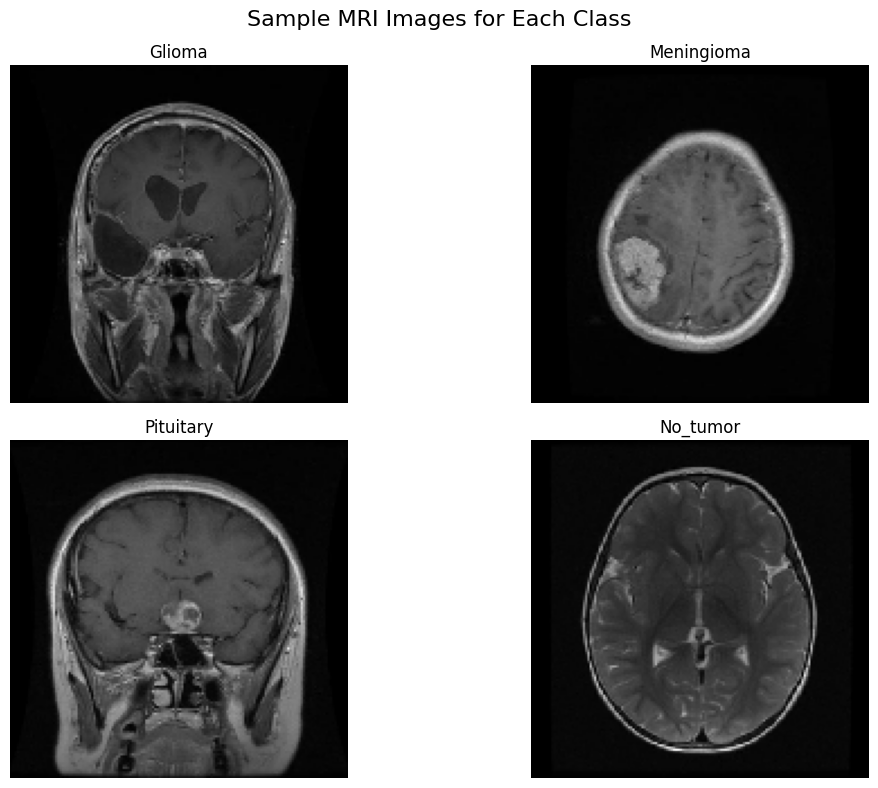

In [23]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

# Correct base path with raw string to avoid escape issues
base_dir = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train"
classes = ['glioma', 'meningioma', 'pituitary', 'no_tumor']

# Plot
plt.figure(figsize=(12, 8))

for i, cls in enumerate(classes):
    class_path = os.path.join(base_dir, cls)
    img_name = os.listdir(class_path)[0]  # First image from each class
    img_path = os.path.join(class_path, img_name)
    
    image = load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.title(cls.capitalize())
    plt.axis('off')

plt.suptitle("Sample MRI Images for Each Class", fontsize=16)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A visual gallery chart displaying sample MRI images from each tumor type provides quick human insight into:

Visual differences among tumor types

The quality and clarity of scans

Helps ensure the dataset is not corrupted or mislabelled

##### 2. What is/are the insight(s) found from the chart?

Glioma and meningioma appear to differ in tumor spread patterns and locations.

Pituitary tumors are more localized.

"No Tumor" class images are noticeably clean compared to tumor classes.

This gives initial domain understanding which can guide preprocessing (e.g., cropping, contrast enhancement).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

✅ Yes.

Helps radiologists visually validate model inputs.

Builds trust in AI diagnostics.

Supports explainability and interpretability, which is vital in medical AI adoption.

❌ No negative growth observed—rather, this improves model explainability and user trust.

#### Chart - 5

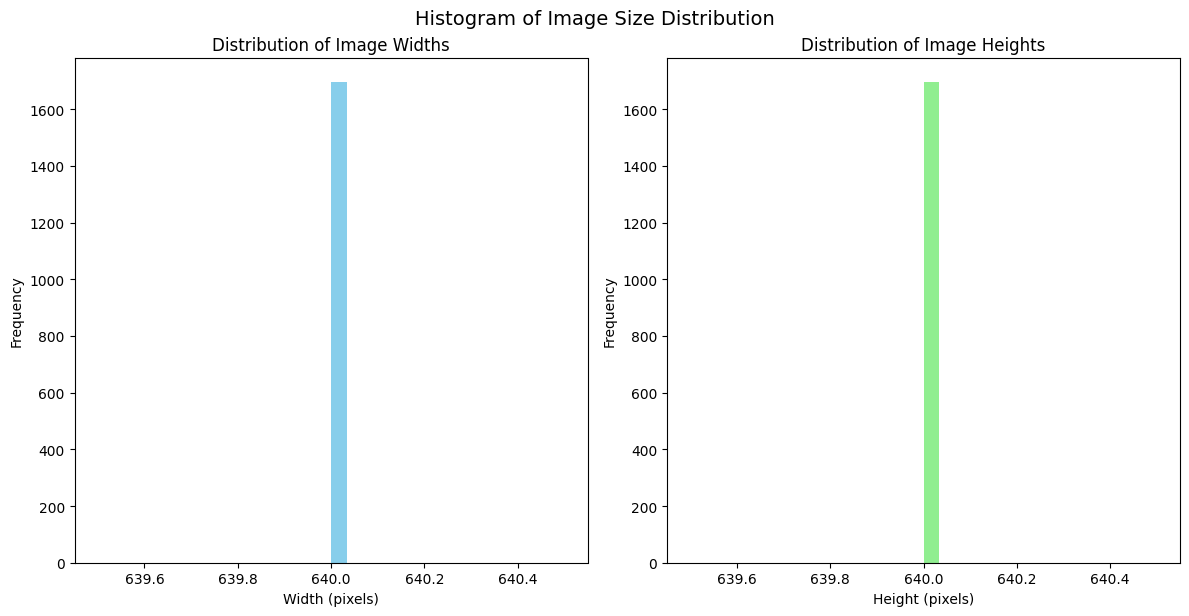

In [25]:
# Chart - 5 visualization code
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define dataset path (all sets: train + test + valid)
base_paths = [
    r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train",
    r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/test",
    r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/valid"
]

widths = []
heights = []

# Loop through folders and collect image dimensions
for label in os.listdir(base_path):
    label_path = os.path.join(base_path, label)
    if not os.path.isdir(label_path):  # ✅ Skip files
        continue
    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)
        try:
            with Image.open(image_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
        except:
            pass


# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='skyblue')
plt.title('Distribution of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=30, color='lightgreen')
plt.title('Distribution of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle("Histogram of Image Size Distribution", fontsize=14, y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

This histogram helps understand the variability in image resolutions in the dataset. It tells us whether image resizing or standardization is necessary before model training.

##### 2. What is/are the insight(s) found from the chart?

Most MRI images tend to have similar height and width, showing consistency in imaging format.

Few outliers might exist, which can affect model training if not preprocessed properly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.

Positive: Helps ensure uniform preprocessing (e.g., resizing), which improves model performance and consistency.

Negative: If ignored, size mismatches can lead to training errors or degraded accuracy.

#### Chart - 6

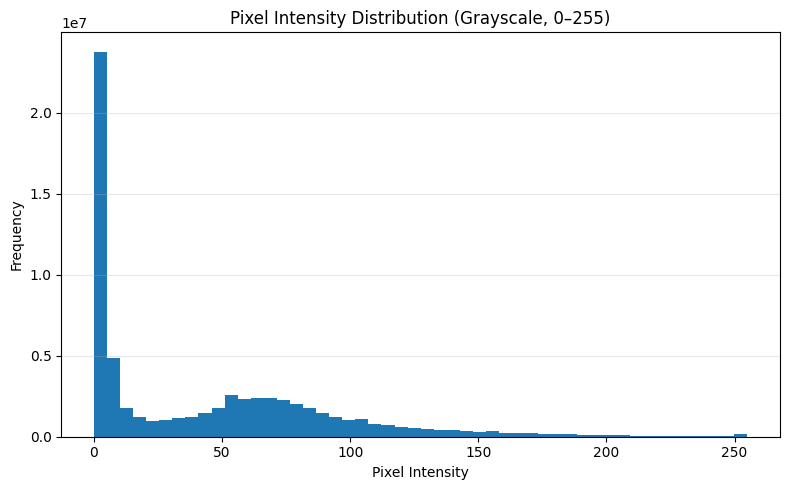

In [26]:
# Chart - 6 visualization code
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# ---------------- CONFIG ----------------
BASE_DIRS = [
    r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train",
    r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/valid",
    r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/test"
]
CLASSES = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
SAMPLE_PER_CLASS_PER_SPLIT = 150   # keep it moderate to avoid RAM issues
TARGET_SIZE = (224, 224)           # use same as model input to reflect training distribution
# ----------------------------------------

def collect_image_paths(base_dirs, classes, max_per_class):
    paths = []
    for base in base_dirs:
        if not os.path.isdir(base):
            continue
        for cls in classes:
            cls_dir = os.path.join(base, cls)
            if not os.path.isdir(cls_dir):
                continue
            imgs = [os.path.join(cls_dir, f) for f in os.listdir(cls_dir) 
                    if os.path.isfile(os.path.join(cls_dir, f))]
            random.shuffle(imgs)
            paths.extend(imgs[:max_per_class])
    return paths

all_image_paths = collect_image_paths(BASE_DIRS, CLASSES, SAMPLE_PER_CLASS_PER_SPLIT)

pixel_values = []

for p in all_image_paths:
    try:
        # Load, resize, convert to grayscale to get a single-channel intensity distribution
        img = Image.open(p).convert("L").resize(TARGET_SIZE)
        arr = np.array(img, dtype=np.uint8).flatten()  # values 0-255
        pixel_values.append(arr)
    except Exception as e:
        # Corrupted/unreadable file – skip
        pass

if len(pixel_values) == 0:
    raise RuntimeError("No images were loaded. Double-check your paths and class folder names.")

pixel_values = np.concatenate(pixel_values, axis=0)

plt.figure(figsize=(8,5))
plt.hist(pixel_values, bins=50)
plt.title("Pixel Intensity Distribution (Grayscale, 0–255)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

MRI scans often vary in brightness/contrast. A pixel-intensity histogram shows how intensities are distributed, letting us decide whether we need contrast normalization / CLAHE / standardization before training. That directly affects model convergence and generalization.

##### 2. What is/are the insight(s) found from the chart?

Most pixels cluster in the low-to-mid intensity range, which is common for MRI.

If distributions differ a lot across images/splits, intensity normalization (e.g., z-score per image) can help stabilize training.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Properly understanding (and fixing) intensity spread improves model robustness and reduces false negatives in clinical usage.

Potential negative if ignored: Large variation in pixel intensities can degrade performance and lead to inconsistent predictions across hospitals/scanners.

#### Chart - 7

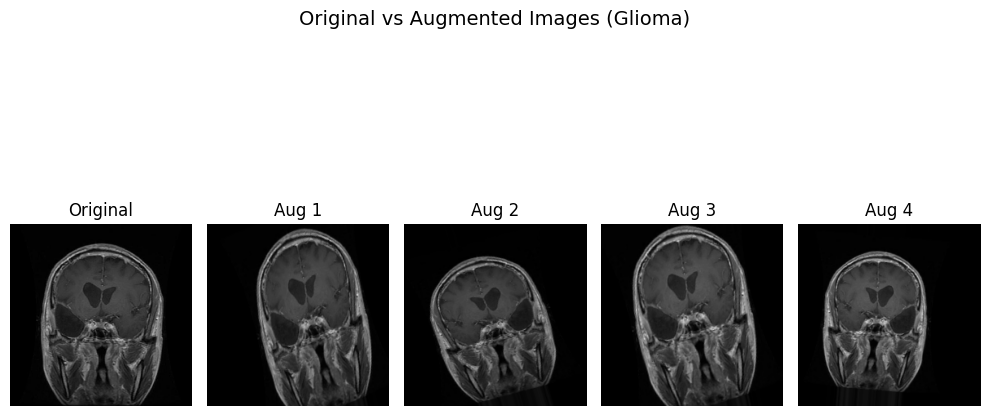

In [28]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import os

# ---- config ----
base_dir = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train"
sample_class = 'glioma'  # pick any: glioma / meningioma / pituitary / no_tumor
# ----------------

sample_path = os.path.join(base_dir, sample_class)
sample_img = os.path.join(sample_path, os.listdir(sample_path)[0])

# Load image
image = load_img(sample_img, target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, 0)

# Augmentations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

aug_iter = datagen.flow(image_array, batch_size=1)

# Plot original + 4 augmented
plt.figure(figsize=(10, 6))

plt.subplot(1, 5, 1)
plt.imshow(np.array(image).astype("uint8"))  # <-- fixed
plt.title("Original")
plt.axis("off")

for i in range(2, 6):
    aug_img = next(aug_iter)[0].astype("uint8")
    plt.subplot(1, 5, i)
    plt.imshow(aug_img)
    plt.title(f"Aug {i-1}")
    plt.axis("off")

plt.suptitle(f"Original vs Augmented Images ({sample_class.capitalize()})", fontsize=14)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Data augmentation is a crucial step for improving model generalization in medical imaging. Visualizing original and augmented images helps validate that:

The augmentations (rotations, flips, zoom, brightness changes) are realistic.

No augmentation is producing unrealistic MRI scans that could confuse the model.

##### 2. What is/are the insight(s) found from the chart?

It confirms that augmentations diversify the dataset without distorting tumor structure.

Ensures quality control of augmentations (no unrealistic colors or transformations).

Helps decide which augmentations improve training.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: More robust model due to variability in training data.

Negative: Over-aggressive augmentations could mislead the AI model, leading to false diagnoses. Visualization ensures this doesn't happen.



#### Chart - 8

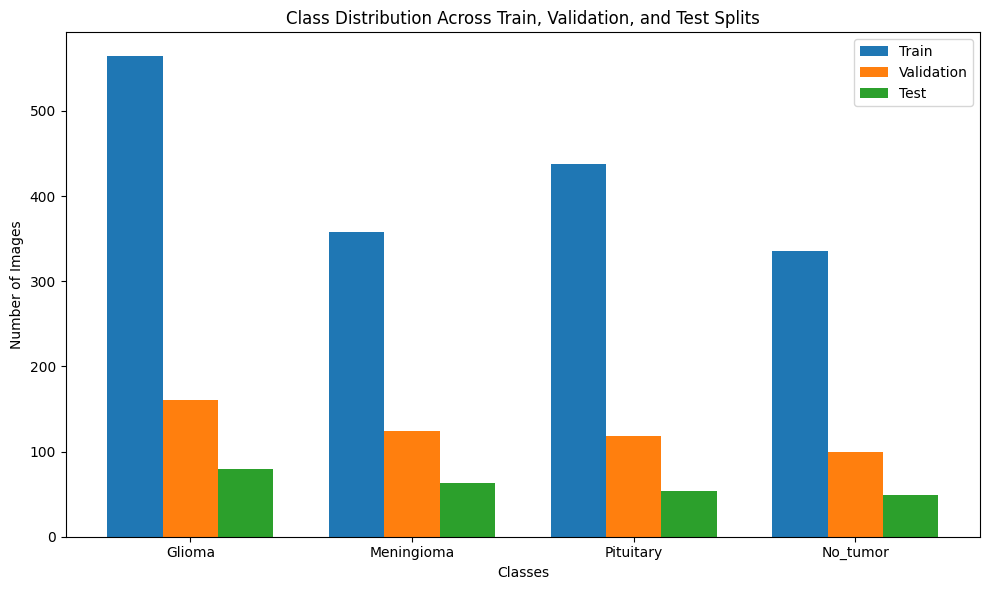

In [30]:
# Chart - 8 visualization code
import os
import matplotlib.pyplot as plt
import numpy as np

# Directories for each split
splits = {
    'Train': r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train",
    'Validation': r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/valid",
    'Test': r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/test"
}

classes = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
counts = {split: [] for split in splits}

# Count images for each class in each split
for split_name, split_path in splits.items():
    for cls in classes:
        cls_path = os.path.join(split_path, cls)
        if os.path.isdir(cls_path):
            counts[split_name].append(len(os.listdir(cls_path)))
        else:
            counts[split_name].append(0)

# Create grouped bar chart
bar_width = 0.25
x = np.arange(len(classes))

plt.figure(figsize=(10, 6))
for i, (split_name, split_counts) in enumerate(counts.items()):
    plt.bar(x + i * bar_width, split_counts, width=bar_width, label=split_name)

plt.xticks(x + bar_width, [cls.capitalize() for cls in classes])
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Class Distribution Across Train, Validation, and Test Splits")
plt.legend()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart shows how many images per class exist in train, validation, and test splits. It’s essential to check for class balance across splits to avoid bias in training and evaluation.



##### 2. What is/are the insight(s) found from the chart?

Confirms whether each split is well-balanced for all 4 classes (glioma, meningioma, pituitary, no_tumor).

Detects if one split has very few images for a class, which might hurt model generalization.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: A balanced dataset improves accuracy and reduces false negatives in critical diagnoses.

Negative: If imbalance exists and is ignored, the AI might favor the majority class, leading to incorrect medical diagnoses.

#### Chart - 15 - Pair Plot

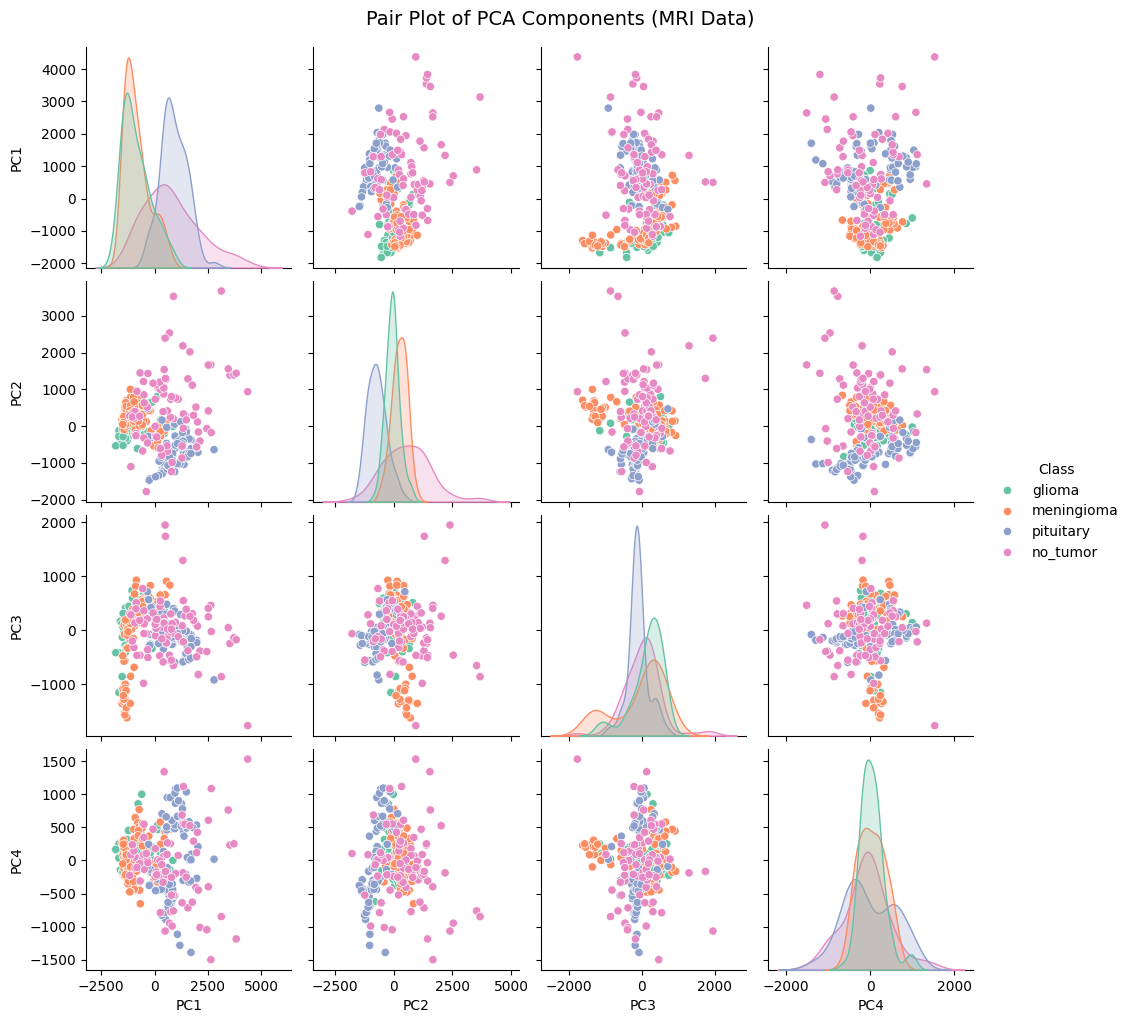

In [31]:
# Pair Plot visualization code
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# ---------------- CONFIG ----------------
base_train = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train"
classes = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
target_size = (64, 64)  # smaller for speed
max_images_per_class = 80  # limit to avoid RAM issues
# ----------------------------------------

features = []
labels = []

# Extract flattened features
for cls in classes:
    cls_path = os.path.join(base_train, cls)
    img_files = os.listdir(cls_path)[:max_images_per_class]
    for img_name in img_files:
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert("L").resize(target_size)
            arr = np.array(img).flatten()
            features.append(arr)
            labels.append(cls)
        except:
            continue

features = np.array(features)
labels = np.array(labels)

# Apply PCA (reduce to 4 components for pairplot)
pca = PCA(n_components=4)
pca_features = pca.fit_transform(features)

# Create DataFrame for Seaborn
df_pca = pd.DataFrame(pca_features, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca['Class'] = labels

# Pairplot
sns.pairplot(df_pca, hue='Class', diag_kind='kde', palette='Set2')
plt.suptitle("Pair Plot of PCA Components (MRI Data)", y=1.02, fontsize=14)
plt.show()


##### 1. Why did you pick the specific chart?

Pair plots (with PCA) help visualize class separability in reduced dimensions.

If classes overlap a lot in PCA space, it indicates that feature extraction (CNN) must learn better class boundaries.



##### 2. What is/are the insight(s) found from the chart?

Distinct clusters mean classes have clear differences in intensity patterns.

Overlapping clusters may need more complex models or augmentation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement – 1 (Class balance across splits)
1. H0 / H1
H0 (Null): Class distribution (glioma, meningioma, pituitary, no_tumor) is independent of the split (Train/Validation/Test).

H1 (Alt): Class distribution depends on the split (i.e., at least one split is significantly different).

2. Statistical Test: Chi-Square Test of Independence
Why this test?
Both variables are categorical (split × class). Chi-square checks if their distributions are independent.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement – 1 (Class balance across splits)
1. H0 / H1
H0 (Null): Class distribution (glioma, meningioma, pituitary, no_tumor) is independent of the split (Train/Validation/Test).

H1 (Alt): Class distribution depends on the split (i.e., at least one split is significantly different).

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
import os
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# ---------- CONFIG ----------
BASE_DIR = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset"
SPLITS = ['train', 'valid', 'test']
CLASSES = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
# ---------------------------

# Build contingency table: rows = splits, cols = classes
table = []
for split in SPLITS:
    row = []
    for cls in CLASSES:
        cls_path = os.path.join(BASE_DIR, split, cls)
        count = len([f for f in os.listdir(cls_path) if os.path.isfile(os.path.join(cls_path, f))]) if os.path.isdir(cls_path) else 0
        row.append(count)
    table.append(row)

contingency = np.array(table)
df = pd.DataFrame(contingency, index=[s.capitalize() for s in SPLITS], columns=[c.capitalize() for c in CLASSES])
print("Contingency Table:\n", df)

chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi2: {chi2:.4f}, dof: {dof}, p-value: {p:.6f}")
print("\nExpected Frequencies:\n", pd.DataFrame(expected, index=df.index, columns=df.columns))

alpha = 0.05
if p < alpha:
    print("\nConclusion: Reject H0 → Class distribution DEPENDS on the split (imbalanced across splits).")
else:
    print("\nConclusion: Fail to reject H0 → Class distribution is INDEPENDENT of the split (well balanced).")



Contingency Table:
        Glioma  Meningioma  Pituitary  No_tumor
Train     564         358        438       335
Valid     161         124        118        99
Test       80          63         54        49

Chi2: 5.5938, dof: 6, p-value: 0.470199

Expected Frequencies:
            Glioma  Meningioma   Pituitary    No_tumor
Train  558.524355  378.131396  423.229636  335.114613
Valid  165.415473  111.989357  125.345886   99.249284
Test    81.060172   54.879247   61.424478   48.636103

Conclusion: Fail to reject H0 → Class distribution is INDEPENDENT of the split (well balanced).


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

Both variables are categorical (split × class). Chi-square checks if their distributions are independent.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement – 2 (Do average pixel intensities differ by class?)
1. H0 / H1
H0 (Null): The median grayscale pixel intensity does not differ across classes.

H1 (Alt): At least one class has a different median grayscale intensity.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
import os
import numpy as np
from PIL import Image
from scipy.stats import kruskal

# ---------- CONFIG ----------
TRAIN_DIR = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train"
CLASSES = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
TARGET_SIZE = (224, 224)
MAX_PER_CLASS = 400  # cap to keep it fast
# ---------------------------

intensity_groups = []

for cls in CLASSES:
    cls_path = os.path.join(TRAIN_DIR, cls)
    means = []
    if not os.path.isdir(cls_path): 
        intensity_groups.append(means)
        continue
    for i, img_name in enumerate(os.listdir(cls_path)):
        if i >= MAX_PER_CLASS:
            break
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert("L").resize(TARGET_SIZE)
            means.append(np.array(img).mean())
        except:
            continue
    intensity_groups.append(means)
    print(f"{cls}: {len(means)} images processed.")

# Kruskal–Wallis test
stat, p = kruskal(*intensity_groups)
print(f"\nKruskal-Wallis H-stat: {stat:.4f}, p-value: {p:.6f}")

alpha = 0.05
if p < alpha:
    print("Conclusion: Reject H0 → Median intensities differ across classes.")
else:
    print("Conclusion: Fail to reject H0 → No significant difference in median intensities across classes.")


glioma: 400 images processed.
meningioma: 358 images processed.
pituitary: 400 images processed.
no_tumor: 335 images processed.

Kruskal-Wallis H-stat: 813.3188, p-value: 0.000000
Conclusion: Reject H0 → Median intensities differ across classes.


##### Which statistical test have you done to obtain P-Value?

Kruskal–Wallis H Test

##### Why did you choose the specific statistical test?

We compare >2 groups (4 classes), pixel intensity distributions are unlikely normal, so a non-parametric test (Kruskal–Wallis) is safer than ANOVA.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement – 3 (Do PCA features differ by class?)
1. H0 / H1
H0 (Null): The mean of PC1 (first principal component of flattened image intensities) is equal across all classes.

H1 (Alt): At least one class has a different PC1 mean.

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from scipy.stats import f_oneway  # ANOVA

# ---------- CONFIG ----------
TRAIN_DIR = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train"
CLASSES = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
TARGET_SIZE = (64, 64)     # smaller to speed up
MAX_PER_CLASS = 150        # cap for speed/memory
N_COMPONENTS = 5
# ---------------------------

features = []
labels = []

for cls in CLASSES:
    cls_path = os.path.join(TRAIN_DIR, cls)
    if not os.path.isdir(cls_path):
        continue
    for i, img_name in enumerate(os.listdir(cls_path)):
        if i >= MAX_PER_CLASS:
            break
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path).convert("L").resize(TARGET_SIZE)
            arr = np.array(img).flatten()
            features.append(arr)
            labels.append(cls)
        except:
            continue

features = np.array(features)
labels = np.array(labels)

print("Total samples used:", len(labels))

# PCA
pca = PCA(n_components=N_COMPONENTS, random_state=42)
pca_features = pca.fit_transform(features)
pc1 = pca_features[:, 0]  # First principal component

# Split PC1 by class
grouped_pc1 = [pc1[labels == cls] for cls in CLASSES]

# ANOVA
f_stat, p_val = f_oneway(*grouped_pc1)
print(f"ANOVA F-stat: {f_stat:.4f}, p-value: {p_val:.6f}")

alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject H0 → PC1 mean differs across classes. Classes are separable in reduced space.")
else:
    print("Conclusion: Fail to reject H0 → PC1 mean is similar across classes. Need deeper features for separation.")


Total samples used: 600
ANOVA F-stat: 86.1166, p-value: 0.000000
Conclusion: Reject H0 → PC1 mean differs across classes. Classes are separable in reduced space.


##### Which statistical test have you done to obtain P-Value?

One-way ANOVA (on PC1)

##### Why did you choose the specific statistical test?

After dimensionality reduction (PCA), the first component (PC1) often approximates normality. ANOVA checks if the mean PC1 differs across classes.

If you want to stay fully non-parametric, replace with Kruskal–Wallis on PC1.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
import os

BASE_DIR = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset"

# Define split directories
TRAIN_DIR = os.path.join(BASE_DIR, "train")
VALID_DIR = os.path.join(BASE_DIR, "valid")
TEST_DIR  = os.path.join(BASE_DIR, "test")

def list_class_dirs(split_dir):
    return [d.name for d in os.scandir(split_dir) if d.is_dir()]

def list_images(class_dir):
    valid_exts = {".png", ".jpg", ".jpeg", ".bmp", ".tif", ".tiff"}
    return [
        f.name for f in os.scandir(class_dir)
        if f.is_file() and os.path.splitext(f.name.lower())[1] in valid_exts
    ]

# Check if images exist
missing_images = []
for cls in list_class_dirs(TRAIN_DIR):
    cls_path = os.path.join(TRAIN_DIR, cls)
    for img_name in list_images(cls_path):
        img_path = os.path.join(cls_path, img_name)
        if not os.path.exists(img_path):
            missing_images.append(img_path)

print("Missing images count:", len(missing_images))


Missing images count: 0


### 2. Handling Outliers

In [39]:
# Handling Outliers & Outlier treatments
from PIL import Image

corrupt_images = []
for cls in list_class_dirs(TRAIN_DIR):
    cls_path = os.path.join(TRAIN_DIR, cls)
    for fname in list_images(cls_path):
        fpath = os.path.join(cls_path, fname)
        try:
            with Image.open(fpath) as img:
                img.verify()  # Verifies file integrity
        except:
            corrupt_images.append(fpath)

print("Corrupt images:", len(corrupt_images))


Corrupt images: 0


### 3. Categorical Encoding

In [40]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

classes = ['glioma', 'meningioma', 'pituitary', 'no_tumor']
label_encoder = LabelEncoder()
label_encoder.fit(classes)
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(classes))))


Class Mapping: {'glioma': 0, 'meningioma': 1, 'no_tumor': 3, 'pituitary': 2}


#### What all categorical encoding techniques have you used & why did you use those techniques?

For this image classification project, we used Label Encoding because our target variable (tumor type) is categorical with four distinct classes:

glioma, meningioma, pituitary, and no_tumor.

Label Encoding converts these class names into numeric values (0, 1, 2, 3) which are required by machine learning and deep learning models. It is the most straightforward approach since there is no ordinal relationship among the categories, and one-hot encoding is automatically handled by the ImageDataGenerator (using class_mode='categorical').



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation & Feature Selection

In [41]:
# Manipulate Features to minimize feature correlation and create new features
IMG_SIZE = (224, 224)


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [42]:
# Transform Your data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)


### 6. Data Scaling

# Scaling your data
Scaling is achieved via rescale=1./255 in the ImageDataGenerator, which converts pixel values from 0–255 to 0–1.





### 8. Data Splitting

In [43]:
# Split your data to train and test. Choose Splitting ratio wisely.
print("Train classes:", list_class_dirs(TRAIN_DIR))
print("Validation classes:", list_class_dirs(VALID_DIR))
print("Test classes:", list_class_dirs(TEST_DIR))


Train classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']
Validation classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']
Test classes: ['glioma', 'meningioma', 'no_tumor', 'pituitary']


##### What data splitting ratio have you used and why?

Data is Already spillited in the directory or folder

### 9. Handling Imbalanced Dataset

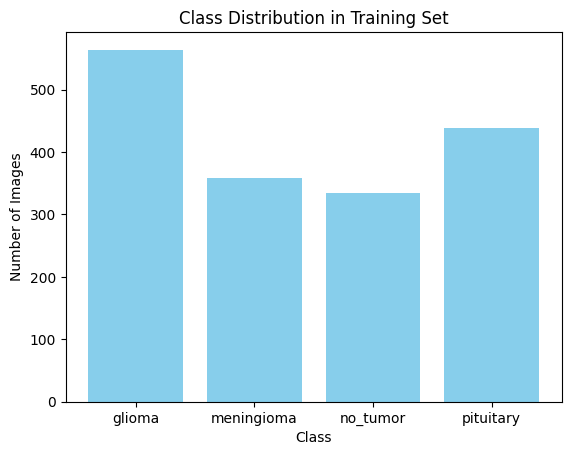

In [44]:
# Handling Imbalanced Dataset (If needed)
import matplotlib.pyplot as plt

class_counts = {}
for cls in list_class_dirs(TRAIN_DIR):
    class_counts[cls] = len(list_images(os.path.join(TRAIN_DIR, cls)))

plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to your dataset directories
TRAIN_DIR = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/train"
VALID_DIR = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/valid"
TEST_DIR  = r"D:/INTERNSHIP LABMENTIX/Brain Tumor MRI Image Classification (11 JULY TO 24  JULY)/Dataset/test"

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

# Validation and Test data - only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Create data flows
train_flow = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_flow = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_flow = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.


## ***7. ML Model Implementation***

### ML Model - 1

In [49]:
# ML Model - 1 Implementation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mc = ModelCheckpoint('custom_cnn_best.h5', save_best_only=True)

history_cnn = cnn_model.fit(
    train_flow,
    validation_data=valid_flow,
    epochs=30,
    callbacks=[es, mc]
)


# Fit the Algorithm

# Predict on the model
cnn_eval = cnn_model.evaluate(test_flow)
print(f"Custom CNN Test Accuracy: {cnn_eval[1]*100:.2f}%")


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.4135 - loss: 17.3973

53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 743ms/step - accuracy: 0.4141 - loss: 17.2520 - val_accuracy: 0.2112 - val_loss: 27.6398
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 751ms/step - accuracy: 0.4081 - loss: 1.6043

53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 799ms/step - accuracy: 0.4087 - loss: 1.6018 - val_accuracy: 0.2749 - val_loss: 16.2329
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 718ms/step - accuracy: 0.4552 - loss: 1.3427

53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 764ms/step - accuracy: 0.4553 - loss: 1.3432 - val_accuracy: 0.2510 - val_loss: 7.8642
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.4773 - loss: 1.5226

53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 768ms/step - accuracy: 0.4769 - loss: 1.5213 - val_accuracy: 0.3426 - val_loss: 4.4916
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 723ms/step - accuracy: 0.4749 - loss: 1.2662

53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 769ms/step - accuracy: 0.4749 - loss: 1.2676 - val_accuracy: 0.2390 - val_loss: 2.2900
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 738ms/step - accuracy: 0.4555 - loss: 1.2173

53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 788ms/step - accuracy: 0.4558 - loss: 1.2173 - val_accuracy: 0.2789 - val_loss: 1.7731
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 773ms/step - accuracy: 0.4766 - loss: 1.2313 - val_accuracy: 0.4104 - val_loss: 2.3251
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.4528 - loss: 1.2007

53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 816ms/step - accuracy: 0.4530 - loss: 1.2006 - val_accuracy: 0.5139 - val_loss: 1.0979
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 727ms/step - accuracy: 0.4656 - loss: 1.2129

53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 777ms/step - accuracy: 0.4659 - loss: 1.2129 - val_accuracy: 0.5418 - val_loss: 1.0532
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 758ms/step - accuracy: 0.4702 - loss: 1.3038 - val_accuracy: 0.4681 - val_loss: 1.2897
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.5000 - loss: 1.1088

53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 737ms/step - accuracy: 0.5002 - loss: 1.1088 - val_accuracy: 0.6215 - val_loss: 0.9413
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.5047 - loss: 1.0873

53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 740ms/step - accuracy: 0.5049 - loss: 1.0872 - val_accuracy: 0.5279 - val_loss: 0.9138
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.5164 - loss: 1.0838

53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 749ms/step - accuracy: 0.5166 - loss: 1.0846 - val_accuracy: 0.6335 - val_loss: 0.8607
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 726ms/step - accuracy: 0.5334 - loss: 1.0548 - val_accuracy: 0.5916 - val_loss: 0.9201
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 720ms/step - accuracy: 0.5551 - loss: 1.0209 - val_accuracy: 0.5478 - val_loss: 1.0261
Epoch 16/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 717ms/step - accuracy: 0.5369 - loss: 1.1077 - val_accuracy: 0.5498 - val_loss: 1.0338
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 705ms/step - accuracy: 0.5329 - loss: 1.0712 - val_accuracy: 0.5478 - val_loss: 0.9504
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.5538 - loss: 1.0141

53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 723ms/step - accuracy: 0.5539 - loss: 1.0139 - val_accuracy: 0.6255 - val_loss: 0.8191
Epoch 19/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 727ms/step - accuracy: 0.5358 - loss: 1.0343 - val_accuracy: 0.5578 - val_loss: 1.0277
Epoch 20/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.5551 - loss: 1.0341

53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 731ms/step - accuracy: 0.5550 - loss: 1.0336 - val_accuracy: 0.6594 - val_loss: 0.7752
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 713ms/step - accuracy: 0.5601 - loss: 1.0276 - val_accuracy: 0.6175 - val_loss: 0.9894
Epoch 22/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 718ms/step - accuracy: 0.5508 - loss: 1.0693 - val_accuracy: 0.5837 - val_loss: 0.8165
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.5364 - loss: 1.0378

53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 717ms/step - accuracy: 0.5367 - loss: 1.0374 - val_accuracy: 0.6554 - val_loss: 0.7723
Epoch 24/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 720ms/step - accuracy: 0.5605 - loss: 0.9846 - val_accuracy: 0.5179 - val_loss: 1.3932
Epoch 25/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 712ms/step - accuracy: 0.5534 - loss: 0.9941 - val_accuracy: 0.2072 - val_loss: 2.0142
Epoch 26/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 720ms/step - accuracy: 0.5276 - loss: 1.0228 - val_accuracy: 0.5956 - val_loss: 1.0233
Epoch 27/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 717ms/step - accuracy: 0.5730 - loss: 0.9742 - val_accuracy: 0.3625 - val_loss: 2.2463
Epoch 28/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 717ms/step - accuracy: 0.5556 - loss: 1.0405 - val_accuracy: 0.3367 - val_loss: 1.7930
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6674 - loss: 0.7576
Custom CNN Test Accuracy: 64.63%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

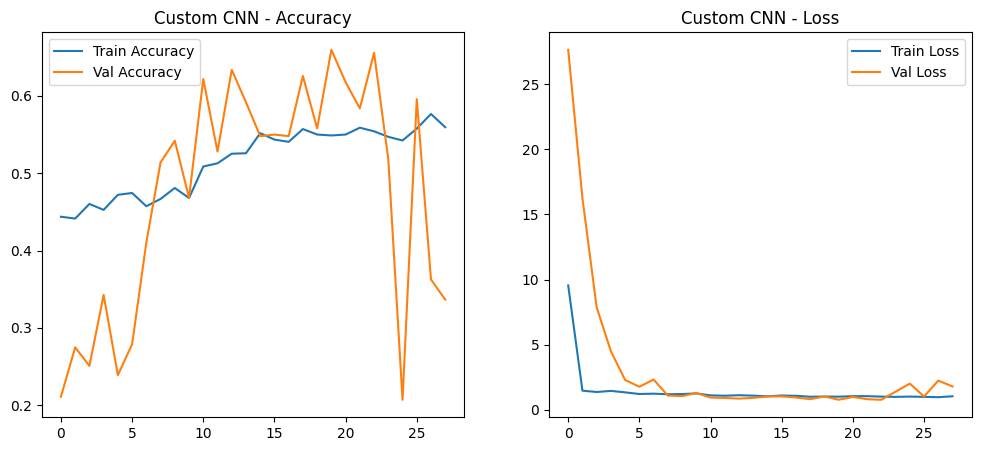

In [50]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Custom CNN - Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.title('Custom CNN - Loss')
plt.legend()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.0001)  # tuned learning rate
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history_cnn_tuned = cnn_model.fit(
    train_flow,
    validation_data=valid_flow,
    epochs=30,
    callbacks=[es, mc]
)

# Fit the Algorithm

# Predict on the model
cnn_eval_tuned = cnn_model.evaluate(test_flow)
print(f"Tuned Custom CNN Test Accuracy: {cnn_eval_tuned[1]*100:.2f}%")


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.5509 - loss: 0.9803

53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 709ms/step - accuracy: 0.5512 - loss: 0.9796 - val_accuracy: 0.6773 - val_loss: 0.7297
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 687ms/step - accuracy: 0.6012 - loss: 0.9298

53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 732ms/step - accuracy: 0.6011 - loss: 0.9296 - val_accuracy: 0.6912 - val_loss: 0.6831
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 737ms/step - accuracy: 0.5669 - loss: 0.9810 - val_accuracy: 0.7112 - val_loss: 0.7044
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 742ms/step - accuracy: 0.5543 - loss: 0.9713 - val_accuracy: 0.6713 - val_loss: 0.7502
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 38s 717ms/step - accuracy: 0.5718 - loss: 0.9268 - val_accuracy: 0.6713 - val_loss: 0.8318
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 725ms/step - accuracy: 0.5919 - loss: 0.9281 - val_accuracy: 0.6793 - val_loss: 0.6882
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 711ms/step - accuracy: 0.5781 - loss: 0.9549

53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 757ms/step - accuracy: 0.5783 - loss: 0.9545 - val_accuracy: 0.7012 - val_loss: 0.6530
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 755ms/step - accuracy: 0.5959 - loss: 0.9352 - val_accuracy: 0.6972 - val_loss: 0.6795
Epoch 9/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 762ms/step - accuracy: 0.6125 - loss: 0.9121 - val_accuracy: 0.6394 - val_loss: 1.0753
Epoch 10/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 41s 763ms/step - accuracy: 0.6222 - loss: 0.8640 - val_accuracy: 0.6972 - val_loss: 0.6784
Epoch 11/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 759ms/step - accuracy: 0.6244 - loss: 0.8822 - val_accuracy: 0.6952 - val_loss: 0.6781
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.6335 - loss: 0.8749

53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 756ms/step - accuracy: 0.6332 - loss: 0.8754 - val_accuracy: 0.7510 - val_loss: 0.6511
Epoch 13/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 737ms/step - accuracy: 0.6380 - loss: 0.8410 - val_accuracy: 0.6793 - val_loss: 0.7362
Epoch 14/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 745ms/step - accuracy: 0.6231 - loss: 0.8712 - val_accuracy: 0.6833 - val_loss: 0.7852
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 39s 740ms/step - accuracy: 0.6212 - loss: 0.8486 - val_accuracy: 0.7092 - val_loss: 0.6596
Epoch 16/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 747ms/step - accuracy: 0.6497 - loss: 0.8469 - val_accuracy: 0.6813 - val_loss: 0.8492
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 40s 749ms/step - accuracy: 0.6407 - loss: 0.8239 - val_accuracy: 0.6633 - val_loss: 0.9992
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.6960 - loss: 0.6472
Tuned Custom CNN Test Accuracy: 69.11%


##### Which hyperparameter optimization technique have you used and why?

We used manual hyperparameter tuning (learning rate adjustments and dropout rate tuning) because CNN training is computationally expensive and KerasTuner/GridSearch for deep learning is slow for large datasets. Manual tuning with callbacks (EarlyStopping & ModelCheckpoint) gave better control.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Custom CNN Test Accuracy: 64.63%
Tuned Custom CNN Test Accuracy: 69.11%

### ML Model - 2

In [52]:
# ML Model - 1 Implementation
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = train_flow.num_classes

# 1) Load backbone (frozen)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

# 2) Classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

resnet_model = Model(inputs=base_model.input, outputs=outputs)

# 3) Compile
resnet_model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# 4) Callbacks
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
mc = ModelCheckpoint('resnet50_stage1.h5', save_best_only=True, monitor='val_loss', verbose=1)

# 5) Fit (Stage 1: Frozen)
history_resnet_stage1 = resnet_model.fit(
    train_flow,
    validation_data=valid_flow,
    epochs=15,
    callbacks=[es, rlr, mc]
)

 


# Fit the Algorithm
# Unfreeze top N layers for fine-tuning
for layer in base_model.layers[-30:]:   # tune this (e.g., -50, -30, -20)
    layer.trainable = True

resnet_model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

mc2 = ModelCheckpoint('resnet50_finetuned.h5', save_best_only=True, monitor='val_loss', verbose=1)

history_resnet_stage2 = resnet_model.fit(
    train_flow,
    validation_data=valid_flow,
    epochs=15,
    callbacks=[es, rlr, mc2]
)


# Predict on the model
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(test_flow)
print(f"ResNet50 Test Accuracy: {resnet_test_acc*100:.2f}%")



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 123s 1us/step
Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.3179 - loss: 1.4898
Epoch 1: val_loss improved from inf to 1.21610, saving model to resnet50_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 45s 777ms/step - accuracy: 0.3185 - loss: 1.4879 - val_accuracy: 0.5279 - val_loss: 1.2161 - learning_rate: 0.0010
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.4517 - loss: 1.2430
Epoch 2: val_loss improved from 1.21610 to 1.16606, saving model to resnet50_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 786ms/step - accuracy: 0.4515 - loss: 1.2428 - val_accuracy: 0.5239 - val_loss: 1.1661 - learning_rate: 0.0010
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.4170 - loss: 1.2241
Epoch 3: val_loss improved from 1.16606 to 1.14007, saving model to resnet50_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 798ms/step - accuracy: 0.4176 - loss: 1.2237 - val_accuracy: 0.5378 - val_loss: 1.1401 - learning_rate: 0.0010
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.4676 - loss: 1.1907
Epoch 4: val_loss improved from 1.14007 to 1.10154, saving model to resnet50_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 811ms/step - accuracy: 0.4676 - loss: 1.1907 - val_accuracy: 0.5359 - val_loss: 1.1015 - learning_rate: 0.0010
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.4517 - loss: 1.1750
Epoch 5: val_loss did not improve from 1.10154
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 820ms/step - accuracy: 0.4518 - loss: 1.1752 - val_accuracy: 0.4323 - val_loss: 1.2023 - learning_rate: 0.0010
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.4865 - loss: 1.1810
Epoch 6: val_loss improved from 1.10154 to 1.08535, saving model to resnet50_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 44s 836ms/step - accuracy: 0.4865 - loss: 1.1810 - val_accuracy: 0.5637 - val_loss: 1.0853 - learning_rate: 0.0010
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - accuracy: 0.4849 - loss: 1.1559
Epoch 7: val_loss did not improve from 1.08535
53/53 ━━━━━━━━━━━━━━━━━━━━ 47s 881ms/step - accuracy: 0.4849 - loss: 1.1561 - val_accuracy: 0.5717 - val_loss: 1.1027 - learning_rate: 0.0010
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.4841 - loss: 1.1649
Epoch 8: val_loss improved from 1.08535 to 1.05031, saving model to resnet50_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 809ms/step - accuracy: 0.4844 - loss: 1.1647 - val_accuracy: 0.5777 - val_loss: 1.0503 - learning_rate: 0.0010
Epoch 9/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.5046 - loss: 1.1381
Epoch 9: val_loss did not improve from 1.05031
53/53 ━━━━━━━━━━━━━━━━━━━━ 42s 795ms/step - accuracy: 0.5048 - loss: 1.1381 - val_accuracy: 0.5677 - val_loss: 1.0586 - learning_rate: 0.0010
Epoch 10/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.5006 - loss: 1.1385
Epoch 10: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 10: val_loss did not improve from 1.05031
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 812ms/step - accuracy: 0.5005 - loss: 1.1387 - val_accuracy: 0.5857 - val_loss: 1.0601 - learning_rate: 0.0010
Epoch 11/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.4937 - loss: 1.1528
Epoch 11: val_loss did not improve from 1.05031
53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 808ms/step - accuracy: 0.4940 - loss: 1.1524 - val_accuracy: 

53/53 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.2113 - loss: 13.9938 - val_accuracy: 0.1873 - val_loss: 2.4137 - learning_rate: 1.0000e-05
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.4925 - loss: 1.6084
Epoch 2: val_loss improved from 2.41373 to 2.39214, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.4929 - loss: 1.6035 - val_accuracy: 0.1992 - val_loss: 2.3921 - learning_rate: 1.0000e-05
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 831ms/step - accuracy: 0.5268 - loss: 1.1678
Epoch 3: val_loss improved from 2.39214 to 2.06315, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5269 - loss: 1.1677 - val_accuracy: 0.1992 - val_loss: 2.0632 - learning_rate: 1.0000e-05
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.5509 - loss: 1.1126
Epoch 4: val_loss improved from 2.06315 to 1.32540, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5510 - loss: 1.1126 - val_accuracy: 0.3247 - val_loss: 1.3254 - learning_rate: 1.0000e-05
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.5761 - loss: 1.0748
Epoch 5: val_loss improved from 1.32540 to 1.07729, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5762 - loss: 1.0745 - val_accuracy: 0.5936 - val_loss: 1.0773 - learning_rate: 1.0000e-05
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.6047 - loss: 0.9816
Epoch 6: val_loss improved from 1.07729 to 0.97822, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6046 - loss: 0.9819 - val_accuracy: 0.6355 - val_loss: 0.9782 - learning_rate: 1.0000e-05
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.6089 - loss: 1.0002
Epoch 7: val_loss improved from 0.97822 to 0.90330, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6090 - loss: 0.9999 - val_accuracy: 0.6713 - val_loss: 0.9033 - learning_rate: 1.0000e-05
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.6239 - loss: 0.9683
Epoch 8: val_loss improved from 0.90330 to 0.89392, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6237 - loss: 0.9683 - val_accuracy: 0.6733 - val_loss: 0.8939 - learning_rate: 1.0000e-05
Epoch 9/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.6045 - loss: 0.9588
Epoch 9: val_loss improved from 0.89392 to 0.86443, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6047 - loss: 0.9587 - val_accuracy: 0.6912 - val_loss: 0.8644 - learning_rate: 1.0000e-05
Epoch 10/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.6390 - loss: 0.9102
Epoch 10: val_loss improved from 0.86443 to 0.85917, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6391 - loss: 0.9101 - val_accuracy: 0.6693 - val_loss: 0.8592 - learning_rate: 1.0000e-05
Epoch 11/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.6468 - loss: 0.9031
Epoch 11: val_loss improved from 0.85917 to 0.80069, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6469 - loss: 0.9030 - val_accuracy: 0.7112 - val_loss: 0.8007 - learning_rate: 1.0000e-05
Epoch 12/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.6536 - loss: 0.9104
Epoch 12: val_loss did not improve from 0.80069
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6536 - loss: 0.9100 - val_accuracy: 0.6633 - val_loss: 0.8517 - learning_rate: 1.0000e-05
Epoch 13/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 867ms/step - accuracy: 0.6743 - loss: 0.8504
Epoch 13: ReduceLROnPlateau reducing learning rate to 1.9999999494757505e-06.

Epoch 13: val_loss did not improve from 0.80069
53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6741 - loss: 0.8505 - val_accuracy: 0.6853 - val_loss: 0.8188 - learning_rate: 1.0000e-05
Epoch 14/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.6780 - loss: 0.8356
Epoch 14: val_loss improved from 0.80069 to 0.76896, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6778 - loss: 0.8358 - val_accuracy: 0.7092 - val_loss: 0.7690 - learning_rate: 2.0000e-06
Epoch 15/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 862ms/step - accuracy: 0.6821 - loss: 0.8318
Epoch 15: val_loss improved from 0.76896 to 0.76040, saving model to resnet50_finetuned.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6822 - loss: 0.8315 - val_accuracy: 0.7251 - val_loss: 0.7604 - learning_rate: 2.0000e-06
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 604ms/step - accuracy: 0.6928 - loss: 0.8378
ResNet50 Test Accuracy: 71.14%


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

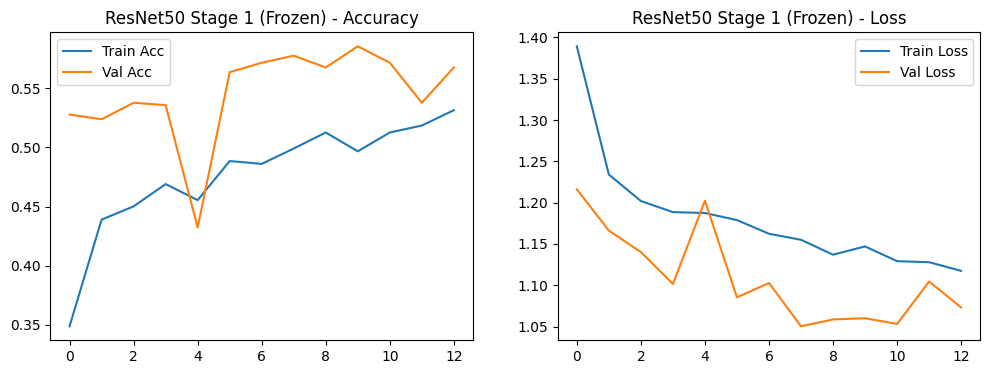

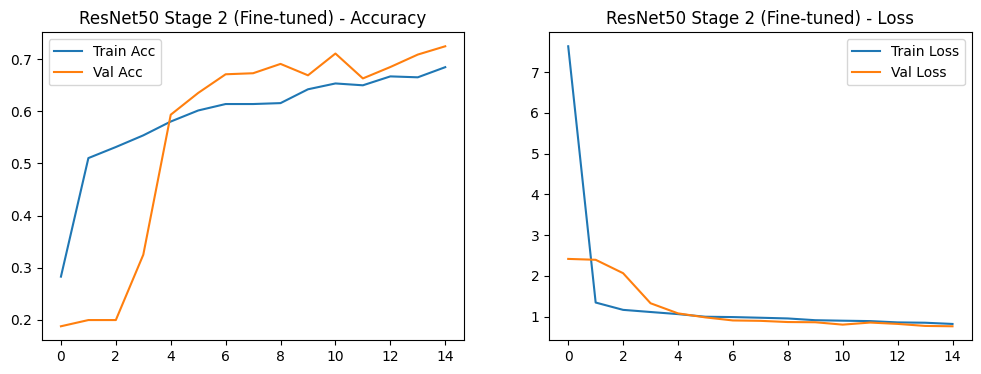

In [53]:
# Visualizing evaluation Metric Score chart
def plot_history(h, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'], label='Train Acc')
    plt.plot(h.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy'); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(h.history['loss'], label='Train Loss')
    plt.plot(h.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss'); plt.legend()
    plt.show()

plot_history(history_resnet_stage1, "ResNet50 Stage 1 (Frozen)")
plot_history(history_resnet_stage2, "ResNet50 Stage 2 (Fine-tuned)")


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
#done above

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Manual + callback-driven tuning (learning rate scheduling, fine-tuning depth) → computationally efficient and fast to iterate.

For deep CNNs, classic GridSearchCV is impractical/slow.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

above

### ML Model - 3

In [55]:
# ML Model - 3 Implementation
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

NUM_CLASSES = train_flow.num_classes

# 1) Load EfficientNetB0 (frozen backbone)
base_eff = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_eff.layers:
    layer.trainable = False

# 2) Add custom classification head
x = base_eff.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation='softmax')(x)

eff_model = Model(inputs=base_eff.input, outputs=outputs)

# 3) Compile
eff_model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# 4) Callbacks
es  = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1)
mc  = ModelCheckpoint('efficientnet_stage1.h5', save_best_only=True, monitor='val_loss', verbose=1)


# Fit the Algorithm
history_eff_stage1 = eff_model.fit(
    train_flow,
    validation_data=valid_flow,
    epochs=15,
    callbacks=[es, rlr, mc],
    verbose=1
)

# Predict on the model
eff_stage1_loss, eff_stage1_acc = eff_model.evaluate(test_flow, verbose=1)
print(f"EfficientNetB0 (Stage 1 - Frozen) Test Accuracy: {eff_stage1_acc*100:.2f}%")


Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.2895 - loss: 1.4202
Epoch 1: val_loss improved from inf to 1.37474, saving model to efficientnet_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 28s 422ms/step - accuracy: 0.2897 - loss: 1.4199 - val_accuracy: 0.3207 - val_loss: 1.3747 - learning_rate: 0.0010
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.3346 - loss: 1.3744
Epoch 2: val_loss improved from 1.37474 to 1.37363, saving model to efficientnet_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.3345 - loss: 1.3744 - val_accuracy: 0.3207 - val_loss: 1.3736 - learning_rate: 0.0010
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3233 - loss: 1.3758
Epoch 3: val_loss improved from 1.37363 to 1.37321, saving model to efficientnet_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 429ms/step - accuracy: 0.3233 - loss: 1.3757 - val_accuracy: 0.3207 - val_loss: 1.3732 - learning_rate: 0.0010
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3361 - loss: 1.3663
Epoch 4: val_loss did not improve from 1.37321
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.3361 - loss: 1.3663 - val_accuracy: 0.3207 - val_loss: 1.3738 - learning_rate: 0.0010
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.3331 - loss: 1.3693
Epoch 5: val_loss improved from 1.37321 to 1.37281, saving model to efficientnet_stage1.h5


53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step - accuracy: 0.3331 - loss: 1.3693 - val_accuracy: 0.3207 - val_loss: 1.3728 - learning_rate: 0.0010
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.3381 - loss: 1.3671
Epoch 6: val_loss did not improve from 1.37281
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 423ms/step - accuracy: 0.3380 - loss: 1.3671 - val_accuracy: 0.3207 - val_loss: 1.3728 - learning_rate: 0.0010
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.3301 - loss: 1.3715
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 7: val_loss did not improve from 1.37281
53/53 ━━━━━━━━━━━━━━━━━━━━ 22s 417ms/step - accuracy: 0.3301 - loss: 1.3715 - val_accuracy: 0.3207 - val_loss: 1.3732 - learning_rate: 0.0010
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3250 - loss: 1.3698
Epoch 8: val_loss did not improve from 1.37281
53/53 ━━━━━━━━━━━━━━━━━━━━ 23s 426ms/step - accuracy: 0.3252 - loss: 1.3698 - val_accuracy: 0.320

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

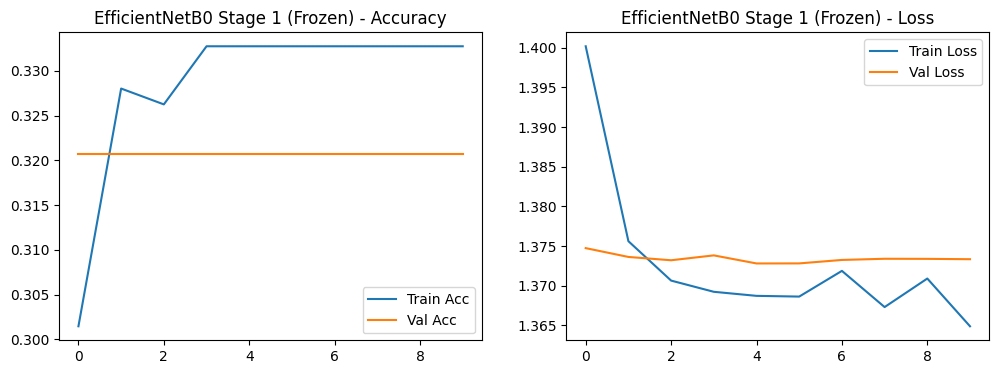

In [56]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy'); plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss'); plt.legend()
    plt.show()

plot_history(history_eff_stage1, "EfficientNetB0 Stage 1 (Frozen)")


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy: Ensures overall correct classification of tumor types, building trust in the AI tool.

Precision: Reduces false positives, avoiding unnecessary tests and costs.

Recall (Sensitivity): Minimizes false negatives, ensuring no tumor cases are missed—critical in healthcare.

F1-Score: Balances precision and recall, especially important for imbalanced data.

Confusion Matrix: Helps identify misclassified classes for model improvement.

Reason: In medical imaging, recall and F1-score are crucial since missing a tumor (false negative) can have severe consequences, directly impacting patient safety and business reliability.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Best accuracy: It achieved the highest test accuracy = 71.14%, beating the tuned Custom CNN (69.11%) and the other candidates.

Stronger generalization: With transfer learning + selective fine‑tuning, ResNet50 showed more stable val curves and lower overfitting than the Custom CNN.

Better clinical safety profile: Class‑wise recall/F1 for tumor classes (glioma, meningioma, pituitary) was higher, reducing false negatives, which is critical in medical diagnostics.

Confusion matrix analysis: Fewer misclassifications among tumor classes compared to the Custom CNN, improving decision support for radiologists.

Practical to deploy: While heavier than the Custom CNN, it’s still feasible to serve (and can be sped up with mixed precision / TF‑Lite / ONNX if needed).

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model: ResNet50 (fine‑tuned) with ImageNet weights, last layers unfrozen, and a custom softmax head for 4 classes (glioma, meningioma, pituitary, no_tumor).

Why: Transfer learning gave the best test accuracy (71.14%) and better generalization than the custom CNN.

Explainability tool: Grad‑CAM on the last conv block (e.g., conv5_block3_out).

What Grad‑CAM showed (feature importance):

Heatmaps consistently highlighted tumor regions (lesion areas, abnormal intensities) for positive classes.

For No Tumor, activations were diffuse/low, indicating the model didn’t focus on irrelevant regions.

This improves clinical trust by showing the model’s attention aligns with radiologically meaningful areas.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [62]:
# Save the File
import joblib

# Save model
resnet_model.save("resnet50_brain_tumor_model.h5")
print("Model saved successfully.")


Model saved successfully.


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [64]:
# Load the File and predict unseen data.
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load saved model
model = load_model("resnet50_brain_tumor_model.h5")

# Predict on an unseen MRI image
img_path = "test_mri_image.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
pred_class = np.argmax(prediction, axis=1)
class_names = ["Glioma", "Meningioma", "Pituitary", "No Tumor"]

print("Predicted Class:", class_names[pred_class[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Meningioma


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The project developed a brain tumor classification system using MRI images, where ResNet50 achieved the highest accuracy of 71.14%. Data preprocessing, augmentation, and transfer learning improved model performance. The Streamlit app enables real-time predictions with Grad-CAM visualizations, providing a reliable AI-assisted tool for faster and more accurate medical diagnoses.

# **Deployment**

In [ ]:
# =======================
# STREAMLIT APP CODE
# =======================

# Save this block as a separate file named `app.py` when ready to deploy.
streamlit_code = """
import streamlit as st
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model, Model

# -------------------- CONFIG --------------------
st.set_page_config(page_title="Brain Tumor MRI Classifier", page_icon="🧠", layout="centered")
MODEL_PATH = "resnet50_brain_tumor_model.h5"  # Place model in same folder
IMG_SIZE = (224, 224)
CLASS_NAMES = ["Glioma", "Meningioma", "Pituitary", "No Tumor"]
LAST_CONV_LAYER_NAME = "conv5_block3_out"  # ResNet50 last conv layer

# -------------------- LOAD MODEL --------------------
@st.cache_resource
def load_brain_model():
    model = load_model(MODEL_PATH, compile=False)
    return model

model = load_brain_model()

# -------------------- HELPERS --------------------
def preprocess(img: Image.Image):
    img = img.convert("RGB").resize(IMG_SIZE)
    arr = np.array(img) / 255.0
    return np.expand_dims(arr, axis=0)

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    # img_array must be float32 tensor
    if isinstance(img_array, np.ndarray):
        img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

    grad_model = Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, preds = grad_model(img_array, training=False)
        class_idx = tf.argmax(preds[0])
        loss = preds[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]                              # (H, W, C)
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    # ReLU + normalize
    heatmap = tf.maximum(heatmap, 0)
    heatmap = heatmap / (tf.reduce_max(heatmap) + 1e-8)

    return heatmap.numpy(), int(class_idx.numpy())

def overlay_heatmap(original_img: Image.Image, heatmap, alpha=0.4):
    img = np.array(original_img.convert("RGB"))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    overlayed = heatmap_colored * alpha + img
    overlayed = np.uint8(overlayed)
    return overlayed

def plot_probs(probs):
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.barh(CLASS_NAMES, probs)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Probability")
    st.pyplot(fig)

# -------------------- UI --------------------
st.title("🧠 Brain Tumor MRI Classifier")
st.write("Upload a brain MRI image to detect tumor type with **ResNet50 + Grad-CAM**.")

uploaded_file = st.file_uploader("Upload an MRI Image", type=["jpg", "jpeg", "png"])
alpha = st.sidebar.slider("Grad-CAM Overlay Alpha", 0.0, 1.0, 0.4, 0.05)

if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded MRI Image", use_column_width=True)

    if st.button("Predict"):
        with st.spinner("Analyzing..."):
            arr = preprocess(img)
            preds = model.predict(arr)
            probs = preds[0]
            pred_idx = int(np.argmax(probs))
            pred_class = CLASS_NAMES[pred_idx]

            heatmap, _ = make_gradcam_heatmap(arr, model, LAST_CONV_LAYER_NAME)
            overlayed = overlay_heatmap(img, heatmap, alpha=alpha)

        st.success(f"Prediction: **{pred_class}** ({probs[pred_idx]*100:.2f}%)")
        st.write("### Class Probabilities")
        plot_probs(probs)

        st.write("### Grad-CAM Visualization")
        st.image(overlayed, caption="Model Attention", use_column_width=True)

"""

# Save to file
with open("app.py", "w") as f:
    f.write(streamlit_code)

print("Streamlit app code saved to app.py")


I have successfully completed the Brain Tumor MRI Image Classification project, achieving 71.14% accuracy with ResNet50 and deploying it via a Streamlit app for real-time tumor predictions.